## Importing Libraries

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import CSVLogger

## Data Preprocessing

### Training Image Processing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70296 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x)
    print(y)
    break

tf.Tensor(
[[[[209.   204.   201.  ]
   [208.5  203.5  200.5 ]
   [209.5  204.5  201.5 ]
   ...
   [204.25 199.25 203.25]
   [202.5  197.5  201.5 ]
   [207.75 202.75 206.75]]

  [[210.5  205.5  202.5 ]
   [211.   206.   203.  ]
   [211.   206.   203.  ]
   ...
   [204.75 199.75 203.75]
   [202.25 197.25 201.25]
   [208.25 203.25 207.25]]

  [[204.75 199.75 196.75]
   [209.25 204.25 201.25]
   [212.5  207.5  204.5 ]
   ...
   [209.75 204.75 208.75]
   [206.5  201.5  205.5 ]
   [208.   203.   207.  ]]

  ...

  [[151.25 142.25 145.25]
   [157.25 148.25 151.25]
   [159.25 150.25 153.25]
   ...
   [155.25 146.25 151.25]
   [147.5  138.5  143.5 ]
   [158.75 149.75 154.75]]

  [[150.5  141.5  144.5 ]
   [151.75 142.75 145.75]
   [162.   153.   156.  ]
   ...
   [145.75 136.75 141.75]
   [153.75 144.75 149.75]
   [155.75 146.75 151.75]]

  [[149.5  140.5  143.5 ]
   [152.75 143.75 146.75]
   [150.75 141.75 144.75]
   ...
   [154.75 145.75 150.75]
   [154.25 145.25 150.25]
   [154.25 145.25 15

### To avoid Overshooting
    1.Choose small learning rate default 0.001 we are taking 0.0001
    2.There may be chance of Underfitting, so increase number of neuron
    3.Add more convloution layer to extract more feature from images there may be possibility that a model unable to capture relecant feature or model 
      is confusing due to lack of feature so feed with more feature

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

### Building convolution Layer

In [8]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\ADMIN\OneDrive\Desktop\New Plant Diseases Dataset\plantd\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) ## To avoid overfitting

### Flattening Operation

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

#### Output Layer

In [17]:
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [32]:
csv_logger = CSVLogger('training_log.csv', append=True)
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10, callbacks=[csv_logger])


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1476s 670ms/step - accuracy: 0.3943 - loss: 2.1403 - val_accuracy: 0.8411 - val_loss: 0.5169
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1577s 718ms/step - accuracy: 0.8344 - loss: 0.5279 - val_accuracy: 0.9175 - val_loss: 0.2540
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1481s 674ms/step - accuracy: 0.9027 - loss: 0.3061 - val_accuracy: 0.9458 - val_loss: 0.1746
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1475s 671ms/step - accuracy: 0.9352 - loss: 0.1978 - val_accuracy: 0.9506 - val_loss: 0.1457
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1478s 673ms/step - accuracy: 0.9488 - loss: 0.1546 - val_accuracy: 0.9550 - val_loss: 0.1371
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1477s 672ms/step - accuracy: 0.9633 - loss: 0.1116 - val_accuracy: 0.9506 - val_loss: 0.1495
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1476s 672ms/step - accuracy: 0.9680 - loss: 0.0950 - val_accuracy: 0.9560 - val_loss: 0.1440
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1473s 671ms/s

In [20]:
# training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10) It is as per video

## Model Evaluation

In [33]:
#Model Evaluation on Training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 435s 198ms/step - accuracy: 0.9887 - loss: 0.0347


In [34]:
print(train_loss, train_acc)

0.03197166323661804 0.9895299673080444


In [35]:
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 103s 187ms/step - accuracy: 0.9643 - loss: 0.1219


In [36]:
print(val_loss, val_acc)

0.1269172579050064 0.9622695446014404


## Saving the Model

In [37]:
# model.save("trained_model.h5")

In [38]:
model.save("trained_model.keras")

In [39]:
training_history.history

{'accuracy': [0.5983982086181641,
  0.8588824272155762,
  0.913138747215271,
  0.9398543238639832,
  0.9533401727676392,
  0.9651331305503845,
  0.9699129462242126,
  0.9754893779754639,
  0.9791737794876099,
  0.9815351963043213],
 'loss': [1.3586593866348267,
  0.4467516839504242,
  0.2714412808418274,
  0.18238958716392517,
  0.14003436267375946,
  0.10629899799823761,
  0.09022592753171921,
  0.0718880370259285,
  0.06440004706382751,
  0.05632692202925682],
 'val_accuracy': [0.84111088514328,
  0.9175392389297485,
  0.9457659721374512,
  0.9506032466888428,
  0.9549852013587952,
  0.9506032466888428,
  0.9559526443481445,
  0.9610744118690491,
  0.9650580286979675,
  0.9622695446014404],
 'val_loss': [0.516933023929596,
  0.2540057301521301,
  0.17456316947937012,
  0.14569784700870514,
  0.13706417381763458,
  0.1495240181684494,
  0.14401160180568695,
  0.12799590826034546,
  0.11992745101451874,
  0.1269172728061676]}

### Recording History in JSON

In [41]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

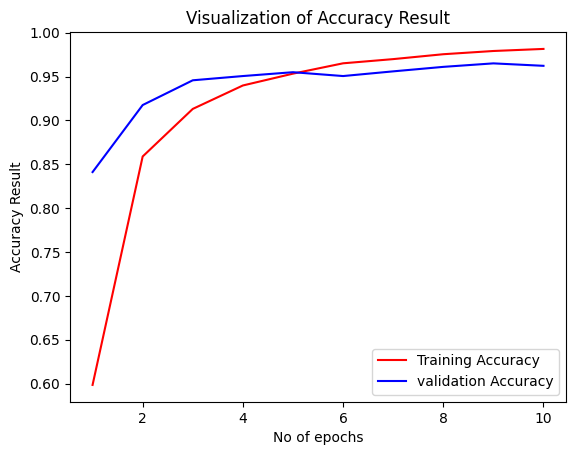

In [42]:
epochs = [i for i in range(1,11)]

plt.plot(epochs, training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color='blue',label='validation Accuracy')
plt.xlabel("No of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()

           
plt.show()

### Some other metrics for model evaluation

In [43]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [44]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [45]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 85s 155ms/step


(array([[1.00000000e+00, 1.78359616e-09, 3.55094093e-10, ...,
         6.74062467e-17, 1.18887575e-15, 7.54100389e-15],
        [9.99699473e-01, 4.57244323e-06, 3.02355716e-07, ...,
         1.41463213e-11, 8.97139585e-11, 2.09378537e-09],
        [9.99999881e-01, 4.86962506e-08, 1.58039022e-08, ...,
         2.62129836e-13, 1.24049805e-12, 3.33383082e-12],
        ...,
        [3.99386053e-08, 9.74013491e-12, 9.03667114e-07, ...,
         3.64874311e-11, 2.07800391e-11, 9.99969959e-01],
        [1.75974204e-08, 1.58461753e-12, 5.21156238e-08, ...,
         1.12600616e-10, 2.54242544e-10, 9.99995351e-01],
        [1.55589585e-14, 5.46014326e-16, 2.23172548e-14, ...,
         5.31493216e-16, 2.24452770e-14, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [51]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [52]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [54]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [62]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

### 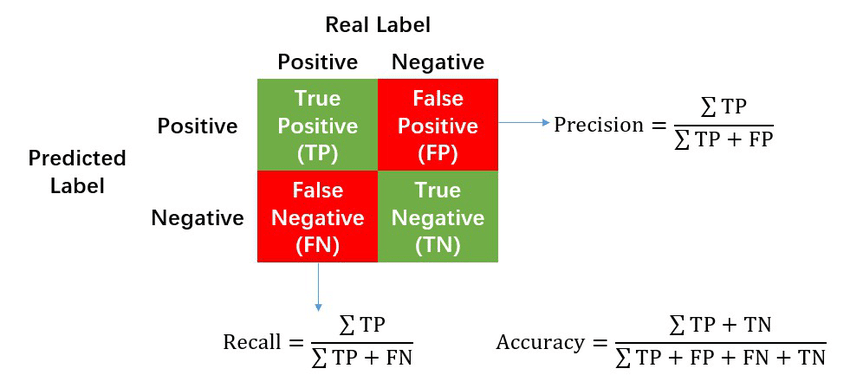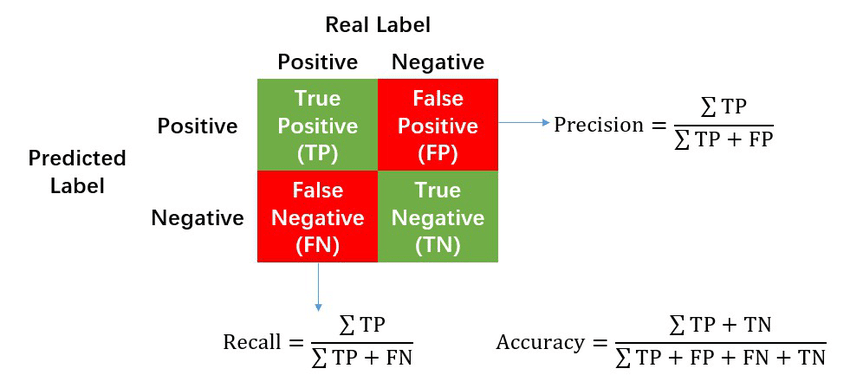

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(Y_true, predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.90      0.94       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.92      1.00      0.96       440
                                   Apple___healthy       0.95      0.98      0.97       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.93      0.90       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

In [68]:
cm = confusion_matrix(Y_true, predicted_categories)
cm.shape

(38, 38)

### Visualization of confusion matrix

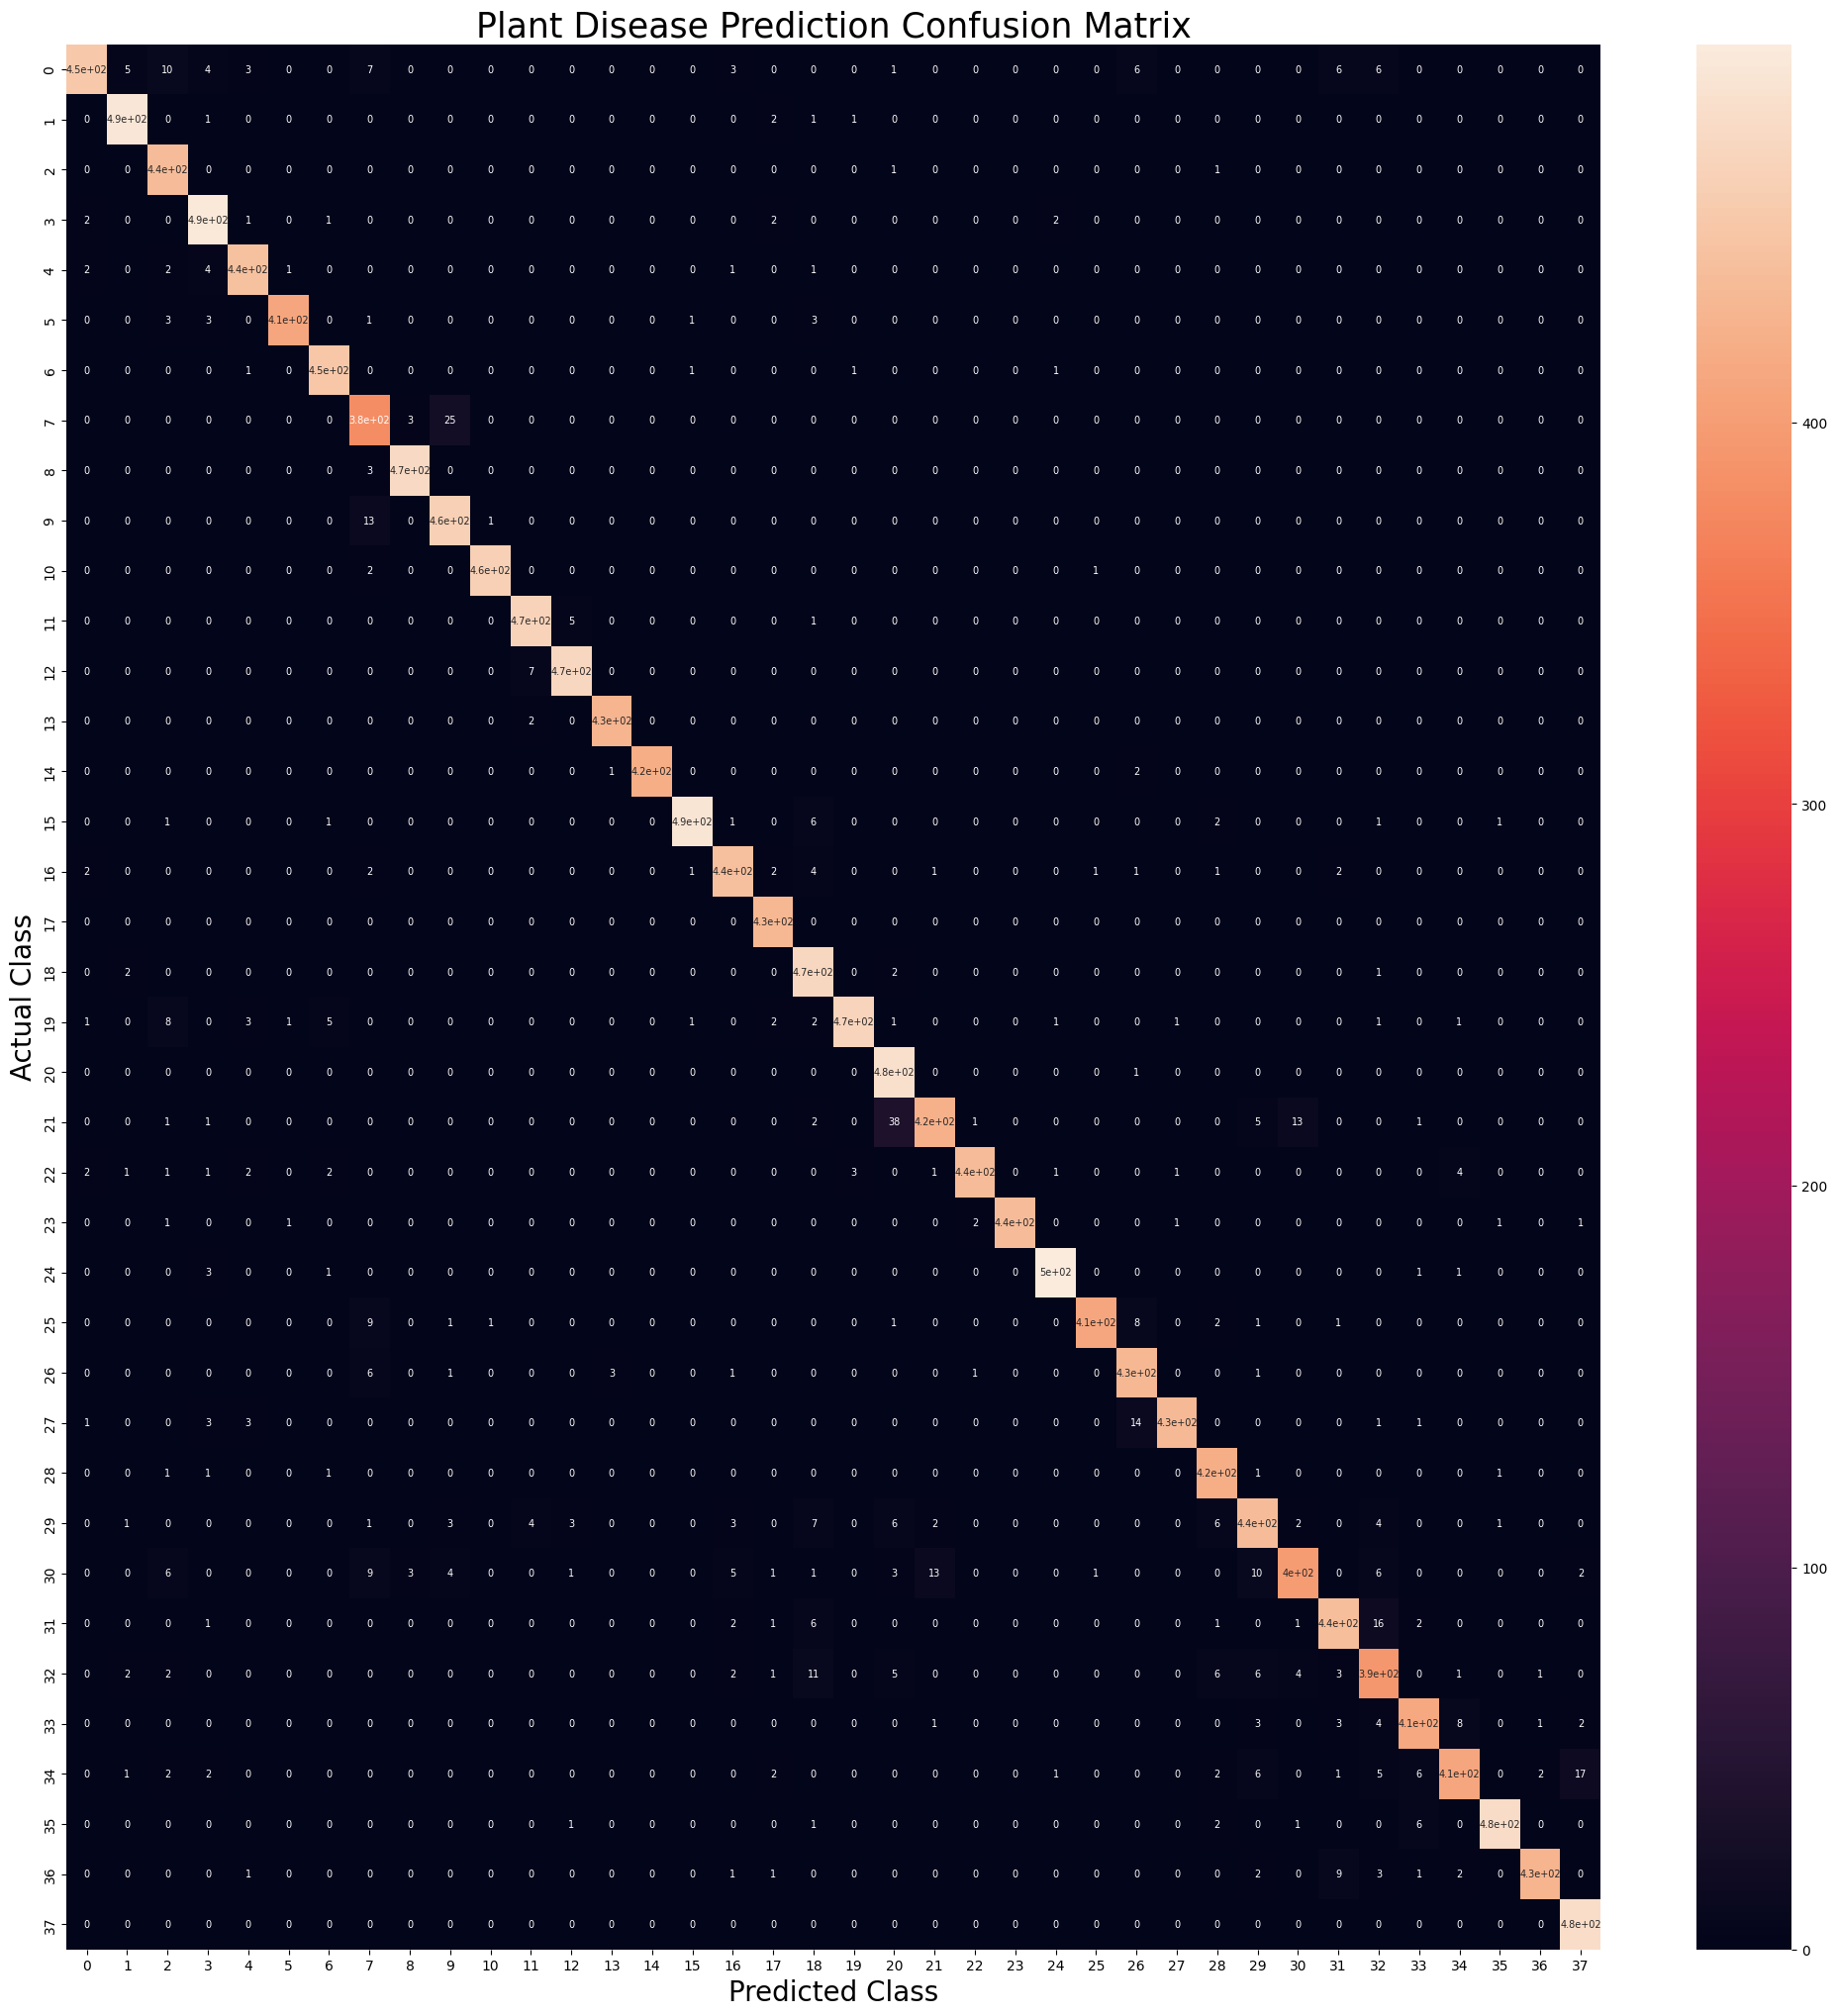

In [80]:
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True, annot_kws={'size':7})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize = 25)
plt.show()